## Independent validation  

Aiming to conduct a independent validation, millions of existing reference samples where harmonized to our grassland classes (this approach is fully documented in [Zenodo](https://doi.org/10.5281/zenodo.13951976)).

Let's get validation samples from [Zenodo](https://doi.org/10.5281/zenodo.13952806):

In [296]:
import requests

zenodo_url = 'https://zenodo.org/records/13952806'
samples_glance_fn = 'gpw_grassland_glance_validation.samples_20000101_20221231_go_epsg.4326_v1.pq'
samples_glance_url = f'{zenodo_url}/files/{samples_glance_fn}?download=1'

samples_glance_req = requests.get(samples_glance_url, allow_redirects=True)

print(f"Downloading {samples_glance_fn}")
open(samples_glance_fn, 'wb').write(samples_glance_req.content)

108077469

In [ ]:
zenodo_url = 'https://zenodo.org/records/13952806'
samples_db_fn = 'gpw_grassland_harm.db_validation.samples_20000101_20221231_go_epsg.4326_v1.pq'
samples_db_url = f'{zenodo_url}/files/{samples_db_fn}?download=1'

samples_db_req = requests.get(samples_db_url, allow_redirects=True)

print(f"Downloading {samples_db_fn}")
open(samples_db_fn, 'wb').write(samples_db_req.content)

### GLANCE 

In [166]:
import pandas as pd
glance_samples = pd.read_parquet('gpw_grassland_glance_validation.samples_20000101_20221231_go_epsg.4326_v1.pq')
glance_samples

,ID,Glance_Class_ID_level2,glance_grass,expected_2000,expected_2001,expected_2002,expected_2003,expected_2004,expected_2005,expected_2006,...,gpw_cultiv.grassland_rf.savgol_p_30m_20130101_20131231_go_epsg.4326_v1,gpw_nat.semi.grassland_rf.savgol_p_30m_20210101_20211231_go_epsg.4326_v1,gpw_rf.nat.semi.grass_30m_m_20180101_20181231_go_epsg.4326_v20240206,gpw_rf.nat.semi.grass_30m_m_20190101_20191231_go_epsg.4326_v20240206,gpw_nat.semi.grassland_rf.savgol_p_30m_20220101_20221231_go_epsg.4326_v1,gpw_rf.nat.semi.grass_30m_m_20160101_20161231_go_epsg.4326_v20240206,gpw_cultiv.grassland_rf.savgol_p_30m_20200101_20201231_go_epsg.4326_v1,gpw_rf.nat.semi.grass_30m_m_20050101_20051231_go_epsg.4326_v20240206,gpw_cultiv.grassland_rf.savgol_p_30m_20060101_20061231_go_epsg.4326_v1,gpw_cultiv.grassland_rf.savgol_p_30m_20100101_20101231_go_epsg.4326_v1
108,981851.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,21.0,22.0,29.0,20.0,23.0,13.0,24.0,17.0,14.0
316,993164.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.0,22.0,22.0,24.0,20.0,20.0,42.0,15.0,32.0,40.0
447,986417.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,953480.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,953972.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754754,1243779.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825128,1243780.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882785,1243787.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
908150,1243782.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
import numpy as np

glance_samples['n_years'] = np.sum(~np.isnan(glance_samples[[ f'expected_{y}' for y in range(2000,2021) ]].to_numpy()), axis=-1)

glance_singleyear = glance_samples[glance_samples['n_years'] == 1]
glance_multiyear = glance_samples[glance_samples['n_years'] == 21]

culg_raw = glance_multiyear.columns[glance_multiyear.columns.str.contains('rf.seeded.grass_30m')].sort_values()
culg = glance_multiyear.columns[glance_multiyear.columns.str.contains('gpw_cultiv.grassland_rf.savgol_p')].sort_values()

nsng_raw = glance_multiyear.columns[glance_multiyear.columns.str.contains('rf.nat.semi.grass')].sort_values()
nsng = glance_multiyear.columns[glance_multiyear.columns.str.contains('gpw_nat.semi.grassland_rf.savgol_p')].sort_values()
glan = glance_multiyear.columns[glance_multiyear.columns.str.contains('expected')].sort_values()

glance_t = []

for g, c, c_raw, n, n_raw, y in zip(glan, culg, culg_raw,  nsng, nsng_raw, range(2000,2023)):
    
    rename_dict = {}
    rename_dict[g] = 'glance'
    rename_dict[c] = 'gpw_cultiv.grassland_rf.savgol_p'
    rename_dict[c_raw] = 'gpw_cultiv.grassland_rf_p'
    rename_dict[n] = 'gpw_nat.semi.grassland_rf.savgol_p'
    rename_dict[n_raw] = 'gpw_nat.semi.grassland_rf_p'
    yglance = pd.DataFrame(glance_multiyear[['ID', 'x', 'y',  g, c, c_raw, n, n_raw]])
    nan_mask = np.logical_not(np.isnan(yglance[g]))
    yglance.loc[np.isnan(yglance[c]), c] = 0
    yglance.loc[np.isnan(yglance[n]), n] = 0
    
    yglance = yglance[nan_mask]
    yglance['year'] = y
    glance_t.append(yglance.rename(columns=rename_dict))
    
glance_t = pd.concat(glance_t)
glance_t

,ID,x,y,glance,gpw_cultiv.grassland_rf.savgol_p,gpw_cultiv.grassland_rf_p,gpw_nat.semi.grassland_rf.savgol_p,gpw_nat.semi.grassland_rf_p,year
583433,1120064.0,0.736126,15.422773,0.0,0.0,NaN,0.0,NaN,2000
99712,1384870.0,0.109872,38.838833,0.0,0.0,2.0,0.0,23.0,2000
58910,1383778.0,0.801929,40.959336,0.0,10.0,11.0,6.0,6.0,2000
181799,1385203.0,0.600543,40.717171,0.0,2.0,2.0,2.0,2.0,2000
316988,1385271.0,0.538847,40.985925,0.0,0.0,0.0,0.0,0.0,2000
...,...,...,...,...,...,...,...,...,...
354168,1124462.0,178.514943,62.712079,1.0,0.0,NaN,0.0,NaN,2020
287062,1124469.0,178.218252,63.252928,1.0,0.0,NaN,0.0,NaN,2020
757103,1124457.0,178.005209,64.712445,1.0,0.0,NaN,0.0,NaN,2020
656029,1124466.0,178.581223,65.240559,1.0,0.0,NaN,0.0,NaN,2020


In [215]:
glance_t['rf.savgol.bthr'] = np.logical_or(glance_t['gpw_cultiv.grassland_rf.savgol_p'] >= 32, glance_t['gpw_nat.semi.grassland_rf.savgol_p'] >= 42).astype('int')
glance_t['rf.savgol.50th'] = np.logical_or(glance_t['gpw_cultiv.grassland_rf.savgol_p'] > 50, glance_t['gpw_nat.semi.grassland_rf.savgol_p'] > 50).astype('int')
glance_t['rf.bthr'] = np.logical_or(glance_t['gpw_cultiv.grassland_rf_p'] >= 32, glance_t['gpw_nat.semi.grassland_rf_p'] >= 42).astype('int')
glance_t['rf.50th'] = np.logical_or(glance_t['gpw_cultiv.grassland_rf_p'] >= 50, glance_t['gpw_nat.semi.grassland_rf_p'] >= 50).astype('int')

#### Temporal accuracy

In [217]:
from sklearn import metrics

rows = []

for year in range(2000, 2021):
    print(f"Running analyze for {year}")
    mask = (glance_t['year'] == year)
    expected, predicted = glance_t[mask]['glance'],  glance_t[mask]['rf.savgol.bthr']
    predicted_50th, predicted_raw_50th, predicted_raw = glance_t[mask]['rf.savgol.50th'], glance_t[mask]['rf.50th'], glance_t[mask]['rf.bthr']
    
    overall = metrics.accuracy_score(expected, predicted)
    f1 = metrics.f1_score(expected, predicted, average=None)[1]
    precision = metrics.precision_score(expected, predicted, average=None)[1]
    recall = metrics.recall_score(expected, predicted, average=None)[1]
    
    overall_50th = metrics.accuracy_score(expected, predicted_50th)
    f1_50th = metrics.f1_score(expected, predicted_50th, average=None)[1]
    precision_50th = metrics.precision_score(expected, predicted_50th, average=None)[1]
    recall_50th = metrics.recall_score(expected, predicted_50th, average=None)[1]
    
    overall_raw = metrics.accuracy_score(expected, predicted_raw)
    f1_raw = metrics.f1_score(expected, predicted_raw, average=None)[1]
    precision_raw = metrics.precision_score(expected, predicted_raw, average=None)[1]
    recall_raw = metrics.recall_score(expected, predicted_raw, average=None)[1]
    
    overall_raw_50th = metrics.accuracy_score(expected, predicted_raw_50th)
    f1_raw_50th = metrics.f1_score(expected, predicted_raw_50th, average=None)[1]
    precision_raw_50th = metrics.precision_score(expected, predicted_raw_50th, average=None)[1]
    recall_raw_50th = metrics.recall_score(expected, predicted_raw_50th, average=None)[1]
    
    rows.append({
        'year': year, 
        'overall': overall,
        'overall_50th': overall_50th,
        'overall_raw': overall_raw,
        'f1': f1,
        'f1_50th': f1_50th,
        'f1_raw': f1_raw,
        'Precision (SG - Balanced thr.)': precision,
        'Precision (SG - 50 thr.)': precision_50th,
        'Precision (No SG - Balanced thr.)': precision_raw,
        'Precision (No SG - 50 thr.)': precision_raw_50th,
        'Recall (SG - Balanced thr.)': recall,
        'Recall (SG - 50 thr.)': recall_50th,
        'Recall (No SG - Balanced thr.)': recall_raw,
        'Recall (No SG - 50 thr.)': recall_raw_50th,
        'n_samples': glance_t[mask].shape[0]
    })

acc_df = pd.DataFrame(rows)
acc_df['year'] = pd.to_datetime(acc_df['year'], format='%Y')
acc_df

Running analyze for 2000
Running analyze for 2001
Running analyze for 2002
Running analyze for 2003
Running analyze for 2004
Running analyze for 2005
Running analyze for 2006
Running analyze for 2007
Running analyze for 2008
Running analyze for 2009
Running analyze for 2010
Running analyze for 2011
Running analyze for 2012
Running analyze for 2013
Running analyze for 2014
Running analyze for 2015
Running analyze for 2016
Running analyze for 2017
Running analyze for 2018
Running analyze for 2019
Running analyze for 2020


,year,overall,overall_50th,overall_raw,f1,f1_50th,f1_raw,Precision (SG - Balanced thr.),Precision (SG - 50 thr.),Precision (No SG - Balanced thr.),Precision (No SG - 50 thr.),Recall (SG - Balanced thr.),Recall (SG - 50 thr.),Recall (No SG - Balanced thr.),Recall (No SG - 50 thr.),n_samples
0,2000-01-01,0.914087,0.870814,0.915230,0.873117,0.792493,0.875699,0.975026,0.992217,0.969377,0.989417,0.790494,0.659701,0.798532,0.678260,218592
1,2001-01-01,0.914347,0.870933,0.914137,0.873557,0.792672,0.874207,0.974991,0.992528,0.966694,0.989637,0.791241,0.659812,0.797871,0.676462,218592
2,2002-01-01,0.914032,0.869245,0.914549,0.873077,0.789346,0.874791,0.974592,0.992733,0.967513,0.989695,0.790714,0.655126,0.798287,0.675581,218592
3,2003-01-01,0.913336,0.868225,0.912627,0.872188,0.787349,0.871730,0.972292,0.992703,0.966363,0.990054,0.790773,0.652394,0.793978,0.669815,218592
4,2004-01-01,0.910244,0.866578,0.910450,0.868017,0.784345,0.869435,0.964150,0.991346,0.955841,0.985327,0.789317,0.648858,0.797355,0.670402,218592
5,2005-01-01,0.909745,0.865009,0.909123,0.867196,0.781046,0.867279,0.964022,0.992476,0.955384,0.988653,0.788045,0.643879,0.794052,0.666206,218592
6,2006-01-01,0.911474,0.864263,0.911932,0.868982,0.779593,0.870506,0.972952,0.992341,0.966872,0.989509,0.785087,0.641962,0.791608,0.657707,218592
7,2007-01-01,0.911397,0.863998,0.912293,0.868741,0.779017,0.871076,0.973836,0.992612,0.967148,0.990379,0.784120,0.641069,0.792366,0.664962,218592
8,2008-01-01,0.912403,0.865869,0.912165,0.870522,0.782715,0.870855,0.973135,0.992688,0.967205,0.990185,0.787485,0.646061,0.791962,0.661537,218592
9,2009-01-01,0.912490,0.866615,0.914027,0.870768,0.784241,0.874213,0.972286,0.992341,0.965122,0.989563,0.788446,0.648291,0.798955,0.669321,218592


In [218]:
from sklearn.metrics import classification_report
print(classification_report(glance_t['glance'],glance_t['rf.savgol.bthr']))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93   2873934
         1.0       0.97      0.79      0.87   1716498

    accuracy                           0.91   4590432
   macro avg       0.93      0.89      0.90   4590432
weighted avg       0.92      0.91      0.91   4590432



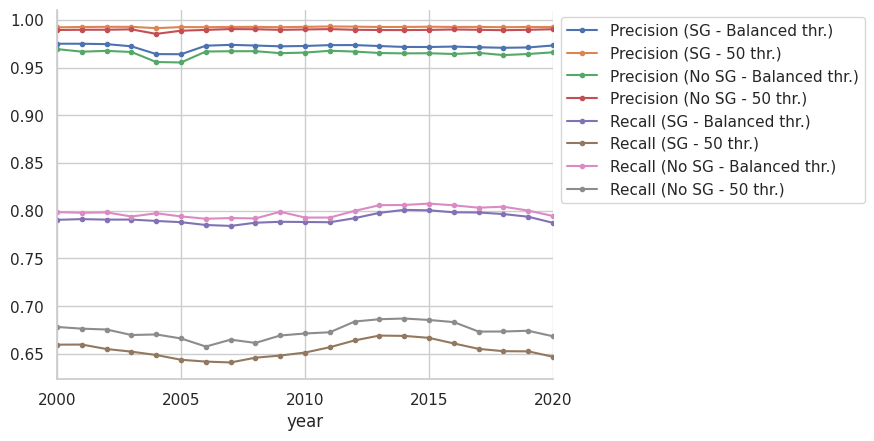

In [219]:
ax = acc_df[['year',
             'Precision (SG - Balanced thr.)', 'Precision (SG - 50 thr.)', 'Precision (No SG - Balanced thr.)', 'Precision (No SG - 50 thr.)', 
             'Recall (SG - Balanced thr.)', 'Recall (SG - 50 thr.)', 'Recall (No SG - Balanced thr.)', 'Recall (No SG - 50 thr.)'
]].set_index('year').plot(kind='line', style='.-')
ax.legend(bbox_to_anchor=(1.0, 1.0))

(0.4, 1.0)

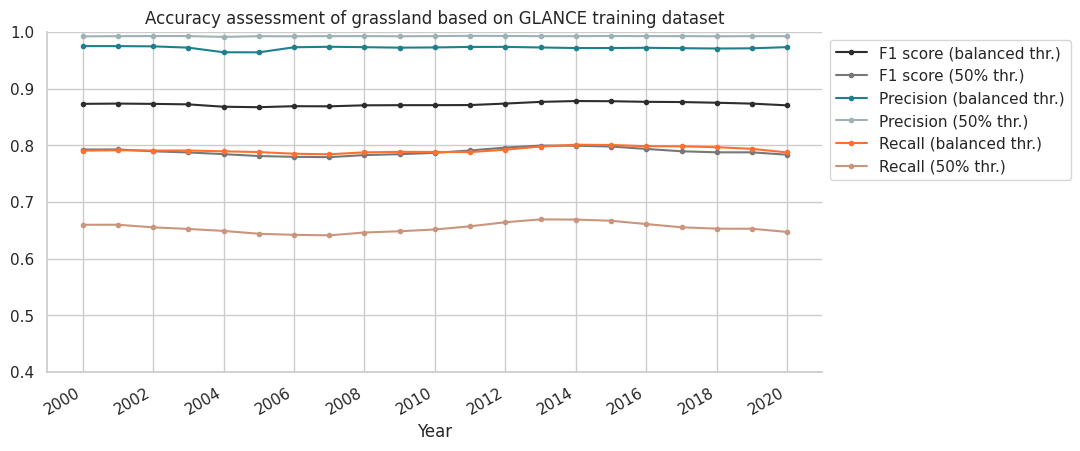

In [220]:
import seaborn as sns
import matplotlib.dates as mdates  

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook', style="whitegrid", rc=custom_params)
ax = acc_df[['year', 'f1', 'f1_50th',
             'Precision (SG - Balanced thr.)', 'Precision (SG - 50 thr.)',
             'Recall (SG - Balanced thr.)', 'Recall (SG - 50 thr.)'
]].rename(columns={
    'f1': 'F1 score (balanced thr.)',
    'f1_50th': 'F1 score (50% thr.)',
    'Precision (SG - Balanced thr.)': 'Precision (balanced thr.)',
    'Precision (SG - 50 thr.)': 'Precision (50% thr.)',
    'Recall (SG - Balanced thr.)': 'Recall (balanced thr.)',
    'Recall (SG - 50 thr.)': 'Recall (50% thr.)',
    'year': 'Year'
}).set_index('Year').plot(kind='line', style='.-', figsize=(10,5), color=['#2d2d2d','#777777', '#1d808c','#9db2b4','#ff6f2f','#cb957d'],  x_compat=True,
    title='Accuracy assessment of grassland based on GLANCE training dataset')

ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlim('1999-01-01','2021-01-01')
ax.set_ylim(0.40,1)

(0.6, 1.02)

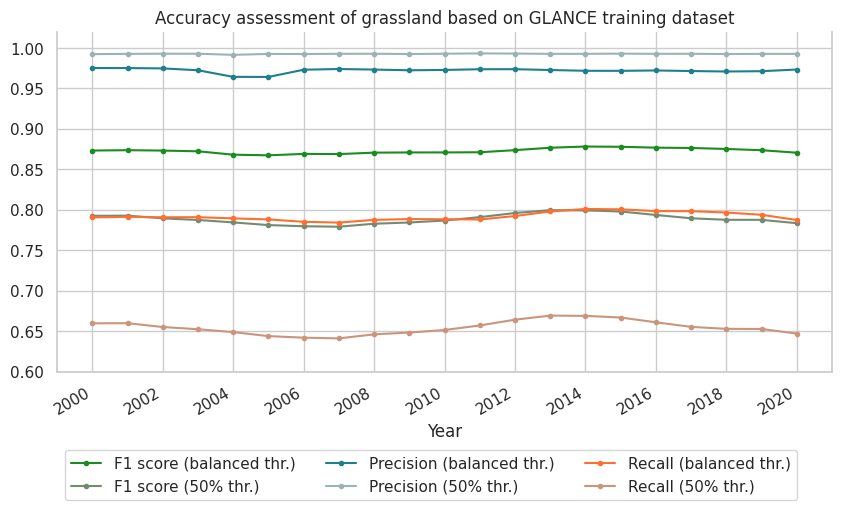

In [222]:
import seaborn as sns
import matplotlib.dates as mdates  
import matplotlib.pyplot as plt

custom_params = {"axes.spines.right": True, "axes.spines.top": False}
sns.set_theme(context='notebook', style="whitegrid", rc=custom_params)
ax = acc_df[['year', 'f1', 'f1_50th',
             'Precision (SG - Balanced thr.)', 'Precision (SG - 50 thr.)',
             'Recall (SG - Balanced thr.)', 'Recall (SG - 50 thr.)'
]].rename(columns={
    'f1': 'F1 score (balanced thr.)',
    'f1_50th': 'F1 score (50% thr.)',
    'Precision (SG - Balanced thr.)': 'Precision (balanced thr.)',
    'Precision (SG - 50 thr.)': 'Precision (50% thr.)',
    'Recall (SG - Balanced thr.)': 'Recall (balanced thr.)',
    'Recall (SG - 50 thr.)': 'Recall (50% thr.)',
    'year': 'Year'
}).set_index('Year').plot(kind='line', style='.-', figsize=(10,5), color=['#1b8c1f','#738b73', '#1d808c','#9db2b4','#ff6f2f','#cb957d'],  x_compat=True,
    title='Accuracy assessment of grassland based on GLANCE training dataset')

ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.legend(loc='lower left', ncol=3,
       bbox_to_anchor=(-0, -0.40))

ax.set_xlim('1999-01-01','2021-01-01')
ax.set_ylim(0.60,1.02)

#### Stability index

In [223]:
from sklearn.metrics import precision_score, recall_score, f1_score

si_df = []

for year, rows in glance_t.groupby('year'):
    r = rows[['x','y','rf.savgol.bthr', 'glance']].rename(columns={
        'glance': f'expected',
        'rf.savgol.bthr': f'predicted'
    })
    si_df.append({
        'precision': precision_score(r['expected'], r['predicted']),
        'recall': recall_score(r['expected'], r['predicted']),
        'f1_score': f1_score(r['expected'], r['predicted']),
        'year': year,
        'dataset_name': 'Glance'
    })

si_df = pd.DataFrame(si_df)
si_df = si_df[si_df['year'] <= 2018]
si_df

,precision,recall,f1_score,year,dataset_name
0,0.975026,0.790494,0.873117,2000,Glance
1,0.974991,0.791241,0.873557,2001,Glance
2,0.974592,0.790714,0.873077,2002,Glance
3,0.972292,0.790773,0.872188,2003,Glance
4,0.964150,0.789317,0.868017,2004,Glance
5,0.964022,0.788045,0.867196,2005,Glance
6,0.972952,0.785087,0.868982,2006,Glance
7,0.973836,0.784120,0.868741,2007,Glance
8,0.973135,0.787485,0.870522,2008,Glance
9,0.972286,0.788446,0.870768,2009,Glance


Glance
Precision    0.157362
Recall       0.211537
dtype: float64


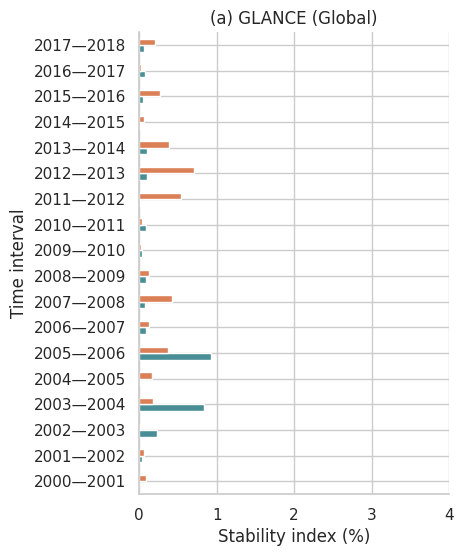

In [224]:
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook', style="whitegrid", rc=custom_params, palette='deep')

def calc_si(si_df, dataset_name, **kargs):

    si_df_sub = si_df[si_df['dataset_name'] == dataset_name]
    metrics = ['precision','recall']
    rename = { i:f'{str(metrics[i]).capitalize()}'  for i in range(0,len(metrics)) }

    acc_stats = si_df_sub[metrics].to_numpy()
    si_df_res = pd.DataFrame((np.abs(np.diff(acc_stats, n=1, axis=0)) / acc_stats[:-1,:]) * 100).rename(columns=rename)
    print(dataset_name)
    print(si_df_res.mean())
    si_df_res['Time interval'] = [ f'{y}—{y+1}' for y in range(si_df_sub['year'].min(), si_df_sub['year'].max()) ]
    
    si_df_res.set_index('Time interval').plot(kind='barh', style='.-', xlim=(0,4),  xlabel='Stability index (%)', figsize=(4,6), **kargs)
    
    #plt.savefig(f'si_{dataset_name}.pdf', bbox_inches='tight')

color=['#498e96','#da7f56']
calc_si(si_df, 'Glance', legend=False, color=color, title='(a) GLANCE (Global)')

### MapBiomas & LCMAP CONUS

In [269]:
import pandas as pd
samples_harm = pd.read_parquet('gpw_grassland_harm.db_validation.samples_20000101_20221231_go_epsg.4326_v1.pq')

db_harm = samples_harm[samples_harm['dataset_name'].isin(['LCMap-Conus','MapBiomas'])]

In [270]:
import pandas as pd
import numpy as np

db_harm = db_harm[np.logical_and.reduce([
    db_harm['gpw_lulc_class'].isin(['Crops and other related agricultural practices', 'Cultivated grassland', 'Other', 'Natural/Semi-natural grassland']),
    np.logical_not(np.isnan(db_harm['gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'])),
    np.logical_not(np.isnan(db_harm['gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1']))
])]
db_harm

,sample_id,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight,observation,x,y,ref_date,glad_tile_id,geometry,overlay_id,gpw_rf.seeded.grass_30m_m_0101_1231_go_epsg.4326_v20240206,gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1,gpw_rf.nat.semi.grass_30m_m_0101_1231_go_epsg.4326_v20240206,gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1,gpw_cultiv.grassland_rf.savgol.madi_p_30m_20000101_20221231_go_epsg.4326_v1,gpw_nat.semi.grassland_rf.savgol.madi_p_30m_20000101_20221231_go_epsg.4326_v1
55574412,2cf804a5346ddabffd4d99b036a5429d,MapBiomas,2000,Other,Other,85297.489049,None,-34.912163,-6.865013,2000-01-01,034W_06S,b'\x01\x01\x00\x00\x00\x9d\xe7\xdb\xc4\xc1tA\x...,1,4.0,4.0,0.0,0.0,0.0,0.0
55574413,ec0c4d64e3b6fefcd627f50aacab132c,MapBiomas,2000,Semi-perennial crop,Crops and other related agricultural practices,85297.489049,None,-34.901114,-6.896544,2000-01-01,034W_06S,b'\x01\x01\x00\x00\x00V\xc8\xc7\xb4WsA\xc0\xe6...,2,31.0,33.0,10.0,9.0,2.0,1.0
55574414,fd91a99564bba12c406197737d571b50,MapBiomas,2000,Perennial crop,Crops and other related agricultural practices,85297.489049,None,-34.926716,-6.956641,2000-01-01,034W_06S,b'\x01\x01\x00\x00\x00\xf0\xa9\xd6\xa1\x9evA\x...,3,25.0,27.0,6.0,4.0,2.0,1.0
55574415,5e52c9ab6c376ffdd686a538d76e841c,MapBiomas,2000,Semi-perennial crop,Crops and other related agricultural practices,85297.489049,None,-34.915397,-6.885495,2000-01-01,034W_06S,b'\x01\x01\x00\x00\x00\xd2\xb2\x07\xbd+uA\xc0\...,4,30.0,30.0,7.0,8.0,2.0,1.0
55574416,cd60b0f605763ad8852bab4e505da130,MapBiomas,2000,Forest formation,Other,85297.489049,None,-34.988700,-6.714905,2000-01-01,034W_06S,b'\x01\x01\x00\x00\x00\x05;8\xb7\x8d~A\xc04\n\...,5,5.0,5.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66010774,bbe8bbd01f5e8debe8f547928c6d4597,LCMap-Conus,2014,Tree Cover,Other,1.000000,None,-124.653502,48.163863,2014-01-01,124W_48N,b'\x01\x01\x00\x00\x00\xeb\xb8\x7f\xf9\xd2)_\x...,11,4.0,3.0,1.0,0.0,3.0,2.0
66010785,bbe8bbd01f5e8debe8f547928c6d4597,LCMap-Conus,2015,Tree Cover,Other,1.000000,None,-124.653502,48.163863,2015-01-01,124W_48N,b'\x01\x01\x00\x00\x00\xeb\xb8\x7f\xf9\xd2)_\x...,11,4.0,3.0,0.0,0.0,3.0,2.0
66010796,bbe8bbd01f5e8debe8f547928c6d4597,LCMap-Conus,2016,Tree Cover,Other,1.000000,None,-124.653502,48.163863,2016-01-01,124W_48N,b'\x01\x01\x00\x00\x00\xeb\xb8\x7f\xf9\xd2)_\x...,11,4.0,3.0,0.0,0.0,3.0,2.0
66010807,bbe8bbd01f5e8debe8f547928c6d4597,LCMap-Conus,2017,Tree Cover,Other,1.000000,None,-124.653502,48.163863,2017-01-01,124W_48N,b'\x01\x01\x00\x00\x00\xeb\xb8\x7f\xf9\xd2)_\x...,11,4.0,4.0,0.0,0.0,3.0,2.0


In [271]:
db_harm.loc[db_harm['original_lulc_class'] == 'Spontaneously vegetated surfaces', 'gpw_lulc_class'] = 'Natural and Semi-natural grass'
db_harm.loc[db_harm['original_lulc_class'] == 'Lichen or moss', 'gpw_lulc_class'] = 'Natural and Semi-natural grass'

db_harm['gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1'] = np.logical_or(db_harm['gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 32, db_harm['gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 42).astype('int')

db_harm['gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 0
db_harm.loc[(db_harm['gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 32), 'gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 1
db_harm.loc[(db_harm['gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 42), 'gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 2

In [272]:
db_harm.loc[:,'gpw_class_lvl1'] = db_harm['gpw_lulc_class'].map({
       'Crops and other related agricultural practices': 0,
       'Other': 0,
       'Cultivated grassland': 1,
       'Natural/Semi-natural grassland': 1
})

In [273]:
db_harm.loc[:,'gpw_class_lvl2'] = db_harm['gpw_lulc_class'].map({
       'Crops and other related agricultural practices': 0,
       'Other': 0,
       'Cultivated grassland': 1,
       'Natural/Semi-natural grassland': 2
})

In [276]:
db_temporal = None

for year, rows in db_harm.groupby('reference_year'):
    r = rows[['sample_id', 'x','y','dataset_name','gpw_class_lvl1', 'gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1']].rename(columns={
        'gpw_class_lvl1': f'expected_{year}',
        'gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1': f'predicted_{year}'
    })
    if db_temporal is None:
        db_temporal = r
    else:
        db_temporal = db_temporal.merge(r[['sample_id', f'expected_{year}',f'predicted_{year}']], on='sample_id', how='inner', suffixes=('', ''))
    print(f"Number of sample for {year}: {db_temporal.shape}")

Number of sample for 2000: (76062, 6)
Number of sample for 2001: (76051, 8)
Number of sample for 2002: (76035, 10)
Number of sample for 2003: (75994, 12)
Number of sample for 2004: (75973, 14)
Number of sample for 2005: (75961, 16)
Number of sample for 2006: (75946, 18)
Number of sample for 2007: (75933, 20)
Number of sample for 2008: (75928, 22)
Number of sample for 2009: (75918, 24)
Number of sample for 2010: (75898, 26)
Number of sample for 2011: (75874, 28)
Number of sample for 2012: (75858, 30)
Number of sample for 2013: (75843, 32)
Number of sample for 2014: (75826, 34)
Number of sample for 2015: (75806, 36)
Number of sample for 2016: (75764, 38)
Number of sample for 2017: (75660, 40)
Number of sample for 2018: (75325, 42)


In [277]:
from sklearn.metrics import precision_score, recall_score, f1_score

si_df_nat = []

for (year, dataset_name), rows in db_harm.groupby(['reference_year','dataset_name']):
    r = rows[['sample_id', 'x','y','dataset_name','gpw_class_lvl1', 'gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1']].rename(columns={
        'gpw_class_lvl1': f'expected',
        'gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1': f'predicted'
    })
    si_df_nat.append({
        'precision': precision_score(r['expected'], r['predicted']),
        'recall': recall_score(r['expected'], r['predicted']),
        'f1_score': f1_score(r['expected'], r['predicted']),
        'year': year,
        'dataset_name': dataset_name
    })

si_df_nat = pd.DataFrame(si_df_nat)

MapBiomas
Precision    0.530070
Recall       1.353282
dtype: float64
LCMap-Conus
Precision    0.410916
Recall       0.770069
dtype: float64


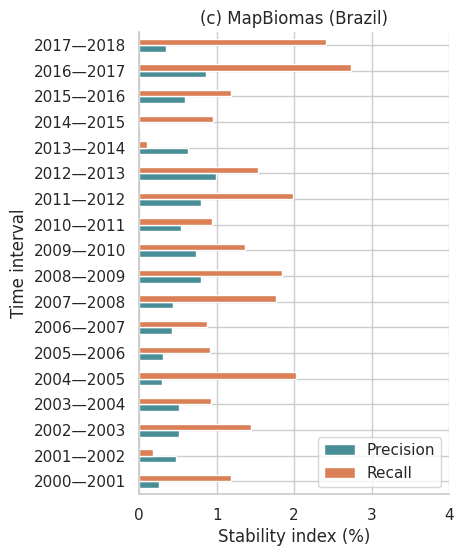

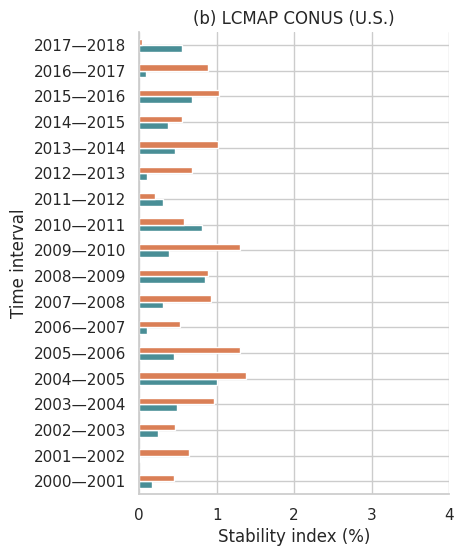

In [283]:
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook', style="whitegrid", rc=custom_params, palette='deep')

def calc_si(si_df, dataset_name, **kargs):

    si_df_sub = si_df[si_df['dataset_name'] == dataset_name]
    metrics = ['precision','recall']
    rename = { i:f'{str(metrics[i]).capitalize()}'  for i in range(0,len(metrics)) }

    acc_stats = si_df_sub[metrics].to_numpy()
    si_df_res = pd.DataFrame((np.abs(np.diff(acc_stats, n=1, axis=0)) / acc_stats[:-1,:]) * 100).rename(columns=rename)
    print(dataset_name)
    print(si_df_res.mean())
    si_df_res['Time interval'] = [ f'{y}—{y+1}' for y in range(si_df_sub['year'].min(), si_df_sub['year'].max()) ]
    
    si_df_res.set_index('Time interval').plot(kind='barh', style='.-', xlim=(0,4),  xlabel='Stability index (%)', figsize=(4,6), **kargs)
    #plt.savefig(f'si_{dataset_name}.pdf', bbox_inches='tight')

color=['#498e96','#da7f56']
calc_si(si_df_nat, 'MapBiomas', color=color, title='(c) MapBiomas (Brazil)')
calc_si(si_df_nat,'LCMap-Conus', legend=False, color=color, title='(b) LCMAP CONUS (U.S.)')
#ax.legend(bbox_to_anchor=(1.0, 1.0))

### Other datasets

In [ ]:
#import pandas as pd
#samples_harm = pd.read_parquet('gpw_grassland_harm.db_validation.samples_20000101_20221231_go_epsg.4326_v1.pq')

In [288]:
samples_harm.loc[samples_harm['original_lulc_class'] == 'Spontaneously vegetated surfaces', 'gpw_lulc_class'] = 'Natural and Semi-natural grass'
samples_harm.loc[samples_harm['original_lulc_class'] == 'Lichen or moss', 'gpw_lulc_class'] = 'Natural and Semi-natural grass'

samples_harm['gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1'] = np.logical_or(samples_harm['gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 32, samples_harm['gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 42).astype('int')

samples_harm['gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 0
samples_harm.loc[(samples_harm['gpw_cultiv.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 32), 'gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 1
samples_harm.loc[(samples_harm['gpw_nat.semi.grassland_rf.savgol_p_30m_0101_1231_go_epsg.4326_v1'] >= 42), 'gpw_grassland_rf.savgol.bthr.lvl2_c_30m_0101_1231_go_epsg.4326_v1'] = 2

In [289]:
samples_harm.loc[:,'gpw_class_lvl1'] = samples_harm['gpw_lulc_class'].map({
       'Crops and other related agricultural practices': 0,
       'Other': 0,
       'Cultivated grassland': 1,
       'Natural/Semi-natural grassland': 1
})

In [ ]:
from sklearn.metrics import classification_report

datasets = samples_harm['dataset_name'].unique()

for d in datasets:
    print('#################')
    print(f"Dataset: {d}")
    print('#################')
    mask = np.logical_and((samples_harm['dataset_name'] == d), np.logical_not(np.isnan(samples_harm['gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1'])))
    print(classification_report(samples_harm[mask]['gpw_class_lvl1'], samples_harm[mask]['gpw_grassland_rf.savgol.bthr.lvl1_c_30m_0101_1231_go_epsg.4326_v1']))